In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
riverData=pd.read_csv('plastic-top-20-rivers.csv')
riverData = riverData.drop(columns=['Code','Year']).sort_values(by=['Plastic mass input from rivers (tonnes)'],ascending=False)
overallWaste=riverData['Plastic mass input from rivers (tonnes)'].sum()
riverData['Pareto']=100*riverData['Plastic mass input from rivers (tonnes)']/overallWaste



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Plastic Spread originating from Gange River (Year=10)')

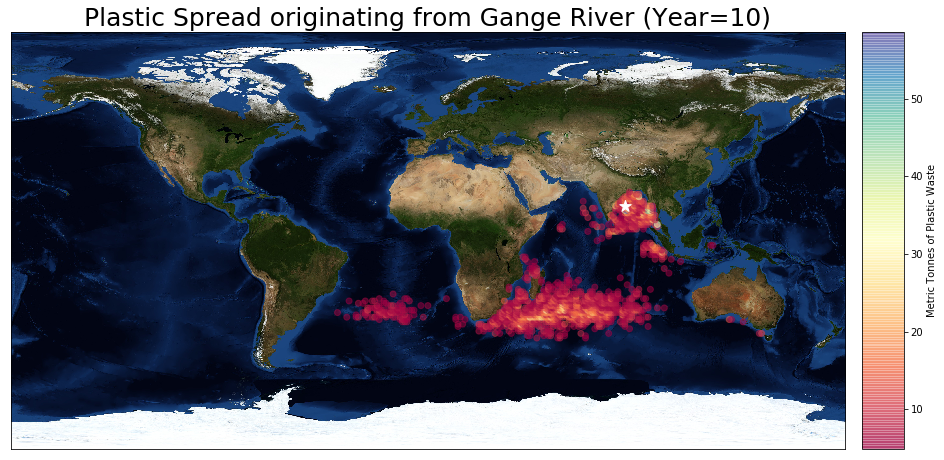

In [8]:
import pandas as pd
from mpl_toolkits.basemap import Basemap

gangesRiver=pd.read_csv("ganges.csv")
yangtzeRiver=pd.read_csv("yangtze.csv")
amazonRiver=pd.read_csv("amazon.csv")

plt.figure(figsize=(16, 12))
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

latitude=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['lat']


longitude=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['lng']


probability=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['probability']


gangesRiver['LatCode']=gangesRiver['lat']//10
gangesRiver['LongCode']=gangesRiver['lng']//10

m.bluemarble()
#m.shadedrelief()
#m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
yangtzeFactor = riverData['Pareto'][0]*overallWaste/200
gangesFactor = riverData['Pareto'][1]*overallWaste/200
amazonFactor = riverData['Pareto'][5]*overallWaste/200
m.scatter(longitude, latitude, latlon=True,
          c=probability*gangesFactor,
          cmap='Spectral', alpha=0.5)
m.colorbar(label=r'Metric Tonnes of Plastic Waste')
m.scatter(85,15,latlon=True,c="White",alpha=1,marker='*', s=145)
plt.title('Plastic Spread originating from Gange River (Year=10)',fontsize=25)

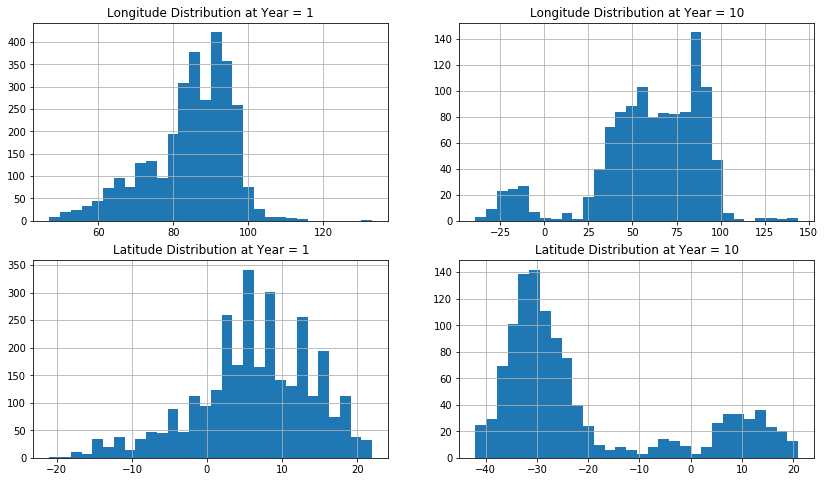

In [9]:
plt.figure(figsize = (14,8))
plt.subplot(221)
plt.title('Longitude Distribution at Year = 1')
gangesRiver[gangesRiver['year']==1]['lng'].hist(bins=30)
plt.subplot(222)
plt.title('Longitude Distribution at Year = 10')
gangesRiver[gangesRiver['year']==10]['lng'].hist(bins=30)
plt.subplot(223)
plt.title('Latitude Distribution at Year = 1')
gangesRiver[gangesRiver['year']==1]['lat'].hist(bins=30)
plt.subplot(224)
plt.title('Latitude Distribution at Year = 10')
gangesRiver[gangesRiver['year']==10]['lat'].hist(bins=30)

In [10]:
gangesSighting=pd.read_csv("ganges95-2015.csv")
gangesSighting.head()

,id,scientificName,scientificNameAuthorship,decimalLongitude,decimalLatitude,class,classid,date_year,day,family,...,month,phylum,phylumid,species,subclass,subclassid,subphylum,subphylumid,superclass,year
0,000008d5-acce-4988-9309-bf9e74454a67,Pomacanthus annularis,"(Bloch, 1787)",99.838600,10.083300,Actinopterygii,10194.0,2012,3.0,Pomacanthidae,...,8,Chordata,1821.0,Pomacanthus annularis,NaN,NaN,Vertebrata,146419.0,Pisces,2012.0
1,000731f1-4b29-4c7a-8349-1c3f786b1040,Astreopora listeri,Bernard,93.000000,10.000000,Anthozoa,1292.0,2015,NaN,Acroporidae,...,NaN,Cnidaria,1267.0,Astreopora listeri,Hexacorallia,1340.0,NaN,NaN,NaN,NaN
2,00090f75-583a-4f46-aecf-74a5381a80c0,Abudefduf bengalensis,"(Bloch, 1787)",99.327000,10.380000,Actinopterygii,10194.0,1996,30.0,Pomacentridae,...,5,Chordata,1821.0,Abudefduf bengalensis,NaN,NaN,Vertebrata,146419.0,Pisces,1996.0
3,000acd00-8171-4a73-a7bd-cf0492c8a940,Cirripectes polyzona,NaN,92.716670,11.150000,Actinopterygii,10194.0,2010,NaN,Blenniidae,...,NaN,Chordata,1821.0,Cirripectes polyzona,NaN,NaN,Vertebrata,146419.0,Pisces,NaN
4,000b36c6-7fad-4991-99e3-1bdf1b27931a,Eptatretus hexatrema,NaN,80.316667,10.966667,Myxini,10189.0,2015,NaN,Myxinidae,...,NaN,Chordata,1821.0,Eptatretus hexatrema,NaN,NaN,Vertebrata,146419.0,Agnatha,NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Marine Species sightings at Ganges River (1995-2015)')

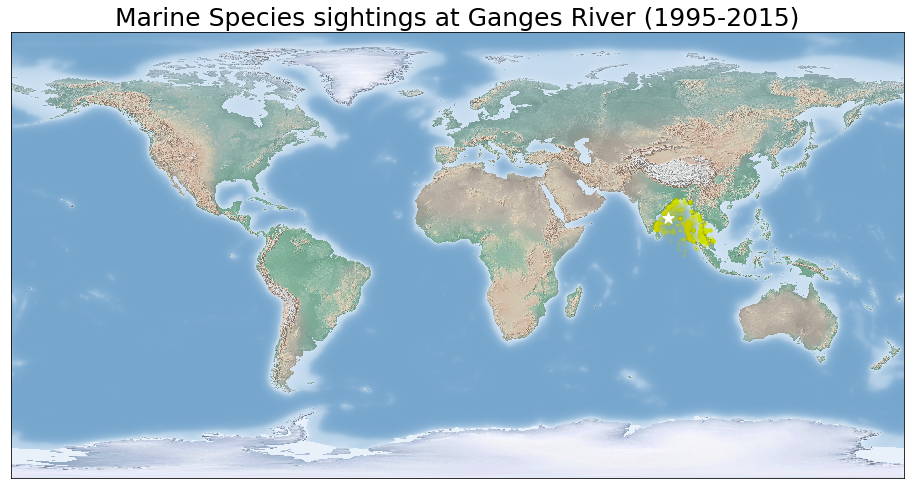

In [11]:
import pandas as pd
from mpl_toolkits.basemap import Basemap

gangesSighting=pd.read_csv("ganges95-2015.csv")


plt.figure(figsize=(16, 12))
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

latitude=gangesSighting['decimalLatitude']

longitude=gangesSighting['decimalLongitude']


#m.bluemarble()
m.shadedrelief()

m.scatter(longitude, latitude, latlon=True,
          c="Yellow",
          cmap='Spectral', alpha=0.02, s=10)
m.scatter(85,15,latlon=True,c="White",alpha=1,marker='*', s=145)
plt.title('Marine Species sightings at Ganges River (1995-2015)',fontsize=25)

In [12]:
Percentage={}
totalSighting=len(gangesSighting)
print("Total Records: "+str(totalSighting))
superClass=gangesSighting.superclass.dropna().unique()
for Class in superClass:
    Percentage[Class] = 100*len(gangesSighting[gangesSighting['superclass']==Class])/len(gangesSighting.superclass.dropna())
print('Pisces: ' + str(Percentage['Pisces'])+"%")
print('Multicrustacea: ' + str(Percentage['Multicrustacea'])+"%")


Total Records: 23703
Pisces: 55.9495521842442%
Multicrustacea: 32.33412538841163%


Covariance of Pisces Sightings Vs. Multicrustacea: 2585.9999999999995
High positive covariance between two variables indicate positive correlation. Increase in sighting of one leads to increase of sighting of another


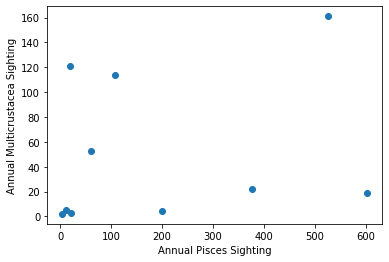

In [13]:
import numpy as np

Pisces={}
PiscesNP=[]
Multicrustacea={}
MulticrustaceaNP=[]
gangesSighting=gangesSighting[(gangesSighting['superclass']=='Pisces')|(gangesSighting['superclass']=='Multicrustacea')]
yearRange=range(1995,2005,1)
for year in yearRange:
    Pisces[year]=gangesSighting[(gangesSighting['superclass']=='Pisces')&(gangesSighting['date_year']==year)]['individualCount'].sum()
    Multicrustacea[year]=gangesSighting[(gangesSighting['superclass']=='Multicrustacea')&(gangesSighting['date_year']==year)]['individualCount'].sum()
    PiscesNP.append(Pisces[year])
    MulticrustaceaNP.append(Multicrustacea[year])
plt.scatter(PiscesNP,MulticrustaceaNP,marker="o")
plt.xlabel('Annual Pisces Sighting')
plt.ylabel('Annual Multicrustacea Sighting')
print("Covariance of Pisces Sightings Vs. Multicrustacea: "+str(np.cov(MulticrustaceaNP,PiscesNP,ddof=0)[0][1]))
print("High positive covariance between two variables indicate positive correlation. Increase in sighting of one leads to increase of sighting of another")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              4.858
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                      0.0416
Time:                        08:35:01   Log-Likelihood:                         -66.885
No. Observations:                  10   AIC:                                      137.8
Df Residuals:                       8   BIC:                                      138.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


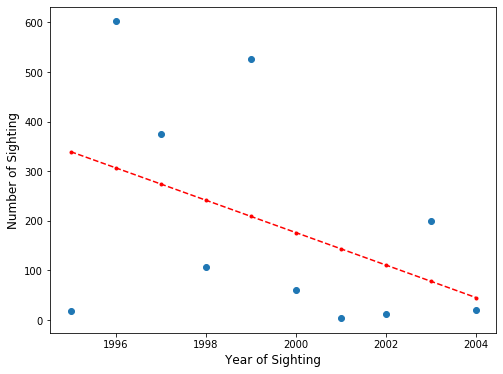

In [14]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x = np.arange(1995,2005)
X = np.column_stack((x, x**2))
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x,(PiscesNP), marker="o")
plt.xlabel('Year of Sighting',fontsize=12)
plt.ylabel('Number of Sighting',fontsize=12)
#len(PiscesNP)
model1 = sm.OLS(PiscesNP, X)
results1=model1.fit()
print(results1.summary())

prstd, iv_l, iv_u = wls_prediction_std(results1)
ax.plot(x, (results1.fittedvalues), 'r--.', label="OLS")



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              5.900
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                      0.0267
Time:                        08:35:01   Log-Likelihood:                         -52.923
No. Observations:                  10   AIC:                                      109.8
Df Residuals:                       8   BIC:                                      110.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

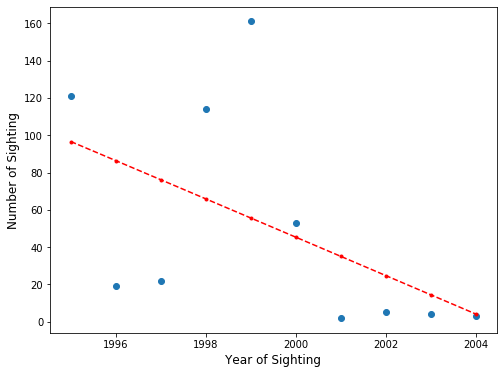

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x,(MulticrustaceaNP), marker="o")
plt.xlabel('Year of Sighting',fontsize=12)
plt.ylabel('Number of Sighting',fontsize=12)
#len(PiscesNP)
model2 = sm.OLS((MulticrustaceaNP), X)
results2=model2.fit()
print(results2.summary())

prstd, iv_l, iv_u = wls_prediction_std(results2)
ax.plot(x, results2.fittedvalues, 'r--.', label="OLS")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.470
Method:                 Least Squares   F-statistic:                              5.426
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                      0.0324
Time:                        08:35:26   Log-Likelihood:                         -53.168
No. Observations:                  10   AIC:                                      110.3
Df Residuals:                       8   BIC:                                      110.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

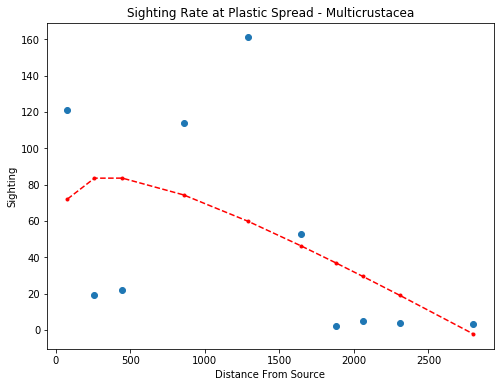

In [19]:
gangesSpreadNP=[]
gangesSpreadNPP=[]
probability=[]
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0,10):
    MEAN=int(gangesRiver[gangesRiver['year']==i]['spread'].mean())
    gangesSpreadNP.append(MEAN)
    gangesSpreadNPP.append(np.log(MEAN))

x = np.array(gangesSpreadNP)
X = np.column_stack((x, np.log(x)))
plt.scatter(x,MulticrustaceaNP)
plt.xlabel('Distance From Source')
plt.ylabel('Sighting')
plt.title('Sighting Rate at Plastic Spread - Multicrustacea')
model3 = sm.OLS(MulticrustaceaNP, X)
results3=model3.fit()
print(results3.summary())

prstd, iv_l, iv_u = wls_prediction_std(results3)
ax.plot(x, results3.fittedvalues, 'r--.', label="OLS")


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              6.174
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                      0.0239
Time:                        08:36:32   Log-Likelihood:                         -66.193
No. Observations:                  10   AIC:                                      136.4
Df Residuals:                       8   BIC:                                      137.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

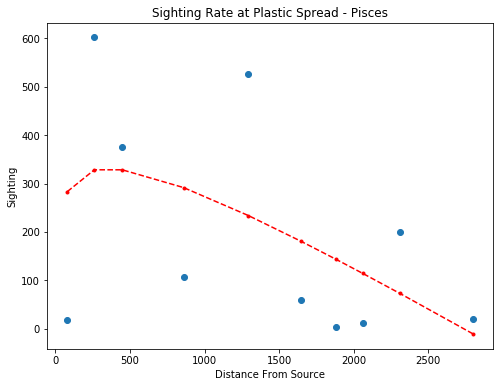

In [21]:
gangesSpreadNP=[]
gangesSpreadNPP=[]
probability=[]
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0,10):
    MEAN=int(gangesRiver[gangesRiver['year']==i]['spread'].mean())
    gangesSpreadNP.append(MEAN)
    gangesSpreadNPP.append(np.log(MEAN))

x = np.array(gangesSpreadNP)
X = np.column_stack((x, np.log(x)))
plt.scatter(x,PiscesNP)
plt.xlabel('Distance From Source')
plt.ylabel('Sighting')
plt.title('Sighting Rate at Plastic Spread - Pisces')
model3 = sm.OLS(PiscesNP, X)
results3=model3.fit()
print(results3.summary())

prstd, iv_l, iv_u = wls_prediction_std(results3)
ax.plot(x, results3.fittedvalues, 'r--.', label="OLS")